<a href="https://colab.research.google.com/github/nmaiya/ColabTimeSeries/blob/main/SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install pmdarima

In [17]:
import pandas as pd
import numpy as np
%matplotlib inline


In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

In [20]:
df=pd.read_csv('/content/co2_mm_mlo.csv')
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [21]:
df['date']=pd.to_datetime(pd.to_datetime({'year':df['year'],'month':df['month'],'day':1}))

In [22]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   year          729 non-null    int64         
 1   month         729 non-null    int64         
 2   decimal_date  729 non-null    float64       
 3   average       722 non-null    float64       
 4   interpolated  729 non-null    float64       
 5   date          729 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [27]:
df.set_index('date',inplace=True)
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


<Axes: xlabel='date'>

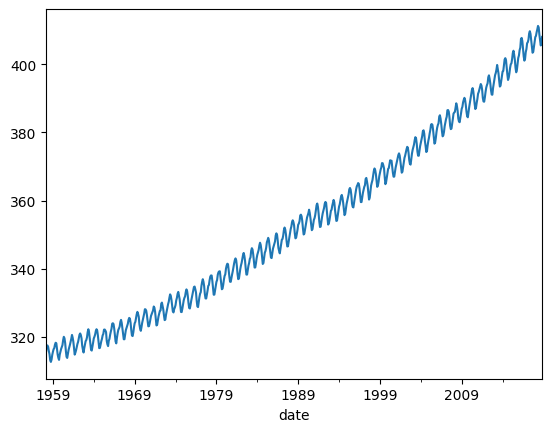

In [28]:
df['interpolated'].plot()

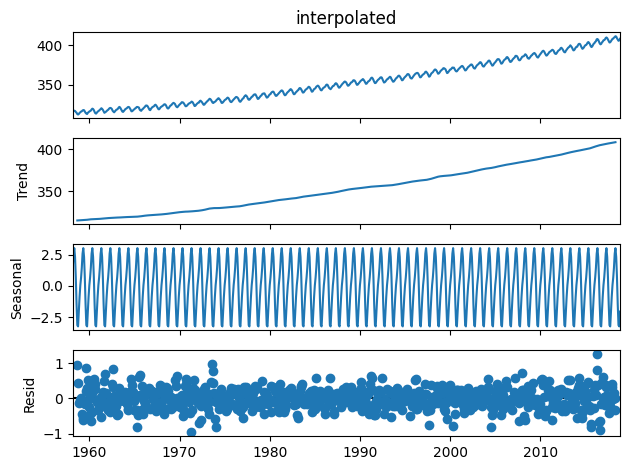

In [29]:
result=seasonal_decompose(df['interpolated'],model='add')
result.plot();

In [30]:
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py:524: ModelFitWarning: Error fitting  ARIMA(1,1,2)(1,0,1)[12]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
  File "/usr/local/lib/python3.10/dist-packages/pmdarima/arima/arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
  File "/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py", line 703, in fit
    mlefit = super().fit(start_params, method=method,
  File "/usr/local/lib/python3.10/dist-packa

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -206.256
Date:                            Thu, 18 Jul 2024   AIC                            424.512
Time:                                    21:01:43   BIC                            452.053
Sample:                                03-01-1958   HQIC                           435.139
                                     - 11-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3509      0.104      3.363      0.001       0.146       0.555
ar.L2          0.0868      0.059      1.483      0.138      -0.028       0.201
ma.L1         -0.7060      0.107     -6.607      0.000      -0.915      -0.497
ar.S.L12       0.9996      0.000   2924.672      0.000       0.999       1.000
ma.S.L12      -0.8659      0.021    -40.954      0.000      -0.907      -0.824
sigma2         0.0957      0.005     20.447      0.000       0.086       0.105
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.79   Prob(JB):                         0.11
Heteroskedasticity (H):               1.13   Skew:                            -0.00
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
tran=df.iloc[:717]
test=df.iloc[717:]

In [35]:
results=SARIMAX(tran['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [36]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(2, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -201.901
Date:                            Thu, 18 Jul 2024   AIC                            415.801
Time:                                    21:03:24   BIC                            443.243
Sample:                                03-01-1958   HQIC                           426.398
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3469      0.071      4.864      0.000       0.207       0.487
ar.L2          0.0814      0.021      3.884      0.000       0.040       0.122
ma.L1         -0.7019      0.059    -11.958      0.000      -0.817      -0.587
ar.S.L12       0.9996      0.000   2867.395      0.000       0.999       1.000
ma.S.L12      -0.8650      0.023    -38.250      0.000      -0.909      -0.821
sigma2         0.0951      0.005     20.412      0.000       0.086       0.104
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 4.65
Prob(Q):                              0.82   Prob(JB):                         0.10
Heteroskedasticity (H):               1.14   Skew:                             0.02
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
start=len(tran)
end=len(tran)+len(test)-1
pred=results.predict(start=start,end=end,typ='levels').rename('SARIMA(2,1,1)(1,0,1,12) Predictions')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

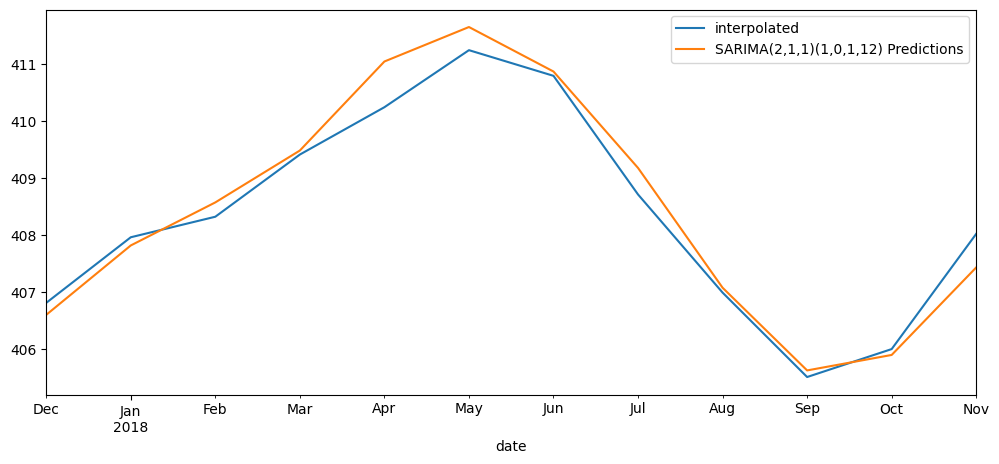

In [38]:
test['interpolated'].plot(figsize=(12,5),legend=True)
pred.plot(legend=True)

In [39]:
from statsmodels.tools.eval_measures import rmse
rmse(test['interpolated'],pred)

0.3581591601097809

In [40]:
results=SARIMAX(df['interpolated'],order=(2,1,1),seasonal_order=(1,0,1,12)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [41]:
forcast=results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(2,1,1)(1,0,1,12) Forcast')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='date'>

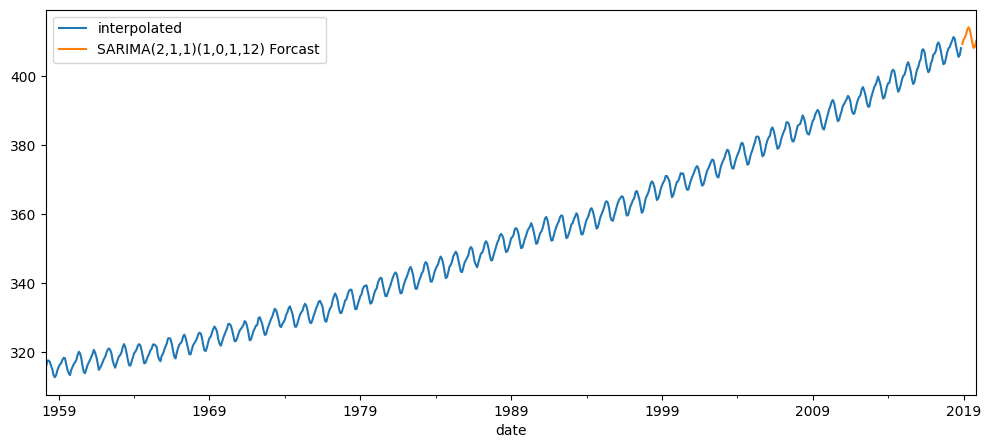

In [42]:
df['interpolated'].plot(figsize=(12,5),legend=True)
forcast.plot(legend=True)